**Исследование данных о пользователях сервиса аренды самокатов GoFast**
    
Нам передали данные о некоторых пользователях популярного сервиса аренды самокатов GoFast из нескольких городов, а также об их поездках.Чтобы совершать поездки по городу, пользователи сервиса GoFast пользуются мобильным приложением.

Сервисом можно пользоваться:

без подписки абонентская плата отсутствует; стоимость одной минуты поездки — 8 рублей; стоимость старта (начала поездки) — 50 рублей;

с подпиской Ultra абонентская плата — 199 рублей в месяц; стоимость одной минуты поездки — 6 рублей; стоимость старта — бесплатно.
    
<b>Цель исследования:</b>
<br/>1. Проанализировать данные о некоторых пользователях популярного сервиса аренды самокатов GoFast из нескольких городов.
<br/>2. Проверить гипотезу о том, тратят ли пользователи с подпиской больше времени на поездки.
<br/>3. Проверить гипотезу о том, что расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров. 
<br/>4. Проверить гипотезуо о том, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки.
<br/>5. Сделать выводы по полученным данным и дать рекоммендации специалистам отдла маркетинга.

<b>Ход исследования:</b>
<br/>1. Данные получим из источников: '/datasets/users_go.csv', '/datasets/rides_go.csv', '/datasets/subscriptions_go.csv'. О качестве данных ничего не известно, поэтому перед тем, как приступать к целям исследования, понадобится обзор данных.
<br/>2. Проверю данные на ошибки и оценю их влияние на исследование. 
<br/>3. Постараюсь найти пути исправления всех ошибок данных, которые могут привести к искажению конечного результата.
<br/>4. Создам все необходимые датафреймы и столбцы, приступлю к проведению исследовательского анализа и проверке гипотез.
    
    Таким образом мое исследование пройдет в 8 шагов:
    1. Загрузка данных
    2. Предобработка данных
    3. Исследовательский анализ данных
    4. Объединение данных
    5. Подсчет выручки
    6. Проверка гипотез
    7. Распределения (дополнительно)
    8. Общие выводы и рекомендации 

</div>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
from scipy.stats import binom
from math import sqrt

#### Шаг 1. Загрузка данных

In [2]:
users_go = pd.read_csv('/datasets/users_go.csv')
rides_go = pd.read_csv('/datasets/rides_go.csv')
subscriptions_go = pd.read_csv('/datasets/subscriptions_go.csv')

In [3]:
#напишем функцию, которая выводит общую информацию о датафрейме 
def infodf(data):
    print(f'Общая информация о датафрейме:')
    print('\n', data.info())
    print('\n',data.describe())
    return data

In [4]:
infodf(users_go)

Общая информация о датафрейме:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB

 None

            user_id          age
count  1565.000000  1565.000000
mean    762.633866    24.922045
std     443.260155     4.553496
min       1.000000    12.000000
25%     378.000000    22.000000
50%     762.000000    25.000000
75%    1146.000000    28.000000
max    1534.000000    43.000000


,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra
...,...,...,...,...,...
1560,829,Федор,29,Пятигорск,free
1561,809,Юрий,26,Сочи,free
1562,307,Ясмина,19,Краснодар,ultra
1563,47,Юрий,28,Тюмень,ultra


In [5]:
infodf(rides_go)

Общая информация о датафрейме:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB

 None

             user_id      distance      duration
count  18068.000000  18068.000000  18068.000000
mean     842.869936   3070.659976     17.805011
std      434.734317   1116.831209      6.091051
min        1.000000      0.855683      0.500000
25%      487.000000   2543.226360     13.597563
50%      889.000000   3133.609994     17.678395
75%     1213.250000   3776.222735     21.724800
max     1534.000000   7211.007745     40.823963


,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28
...,...,...,...,...
18063,1534,3781.098080,19.822962,2021-11-04
18064,1534,2840.423057,21.409799,2021-11-16
18065,1534,3826.185507,18.435051,2021-11-18
18066,1534,2902.308661,16.674362,2021-11-27


In [6]:
infodf(subscriptions_go)

Общая информация о датафрейме:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes

 None

        minute_price  start_ride_price  subscription_fee
count      2.000000          2.000000          2.000000
mean       7.000000         25.000000         99.500000
std        1.414214         35.355339        140.714249
min        6.000000          0.000000          0.000000
25%        6.500000         12.500000         49.750000
50%        7.000000         25.000000         99.500000
75%        7.500000         37.500000        149.250000
max        8.000000         50.000000        199.000000


,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


Пропусков в данных датасетов не наблюдается. В приложении зарегистрировано 1565 человек, возможно есть дублирующиеся записи. Сменить тип данных требуется только в столбце date с object на datetime64.

#### Шаг 2. Предобработка данных

In [7]:
#изменим тип столба date
rides_go['date'] = pd.to_datetime(rides_go['date'], format='%Y-%m-%d')

Проверим за какой период у нас данные, а также проверим столбец длительности на предмет наличия аномалий.

<AxesSubplot:>

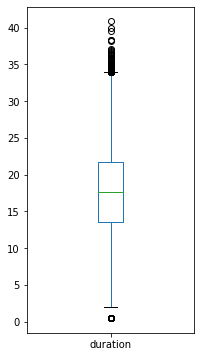

In [8]:
#Внесенные изменения V1:
rides_go['duration'].plot.box(figsize=(3,6))

In [9]:
#Внесенные изменения V1:
pd.pivot_table(rides_go, index='user_id', values='duration', aggfunc=['mean','median'])

,mean,median
,duration,duration
user_id,,
1,17.050409,16.233505
2,17.967662,18.779128
3,19.432793,19.835873
4,20.611684,20.723324
5,15.824903,14.904990
...,...,...
1530,17.198049,16.207316
1531,17.747487,18.308701


In [10]:
#Внесенные изменения V1:
print(f'Максимальные значения в таблице по поездкам: \n{rides_go.max()} мин.')
print(f'\nМинимальные значения в таблице по поездкам: \n{rides_go.min()} мин.')
print(f'\nСредние значения в таблице по поездкам: \n{rides_go.mean()} мин.')
print(f'\nМедианные значения в таблице по поездкам: \n{rides_go.median()} мин.')

Максимальные значения в таблице по поездкам: 
user_id                    1534
distance            7211.007745
duration              40.823963
date        2021-12-30 00:00:00
dtype: object мин.

Минимальные значения в таблице по поездкам: 
user_id                       1
distance               0.855683
duration                    0.5
date        2021-01-01 00:00:00
dtype: object мин.

Средние значения в таблице по поездкам: 
user_id      842.869936
distance    3070.659976
duration      17.805011
dtype: float64 мин.

Медианные значения в таблице по поездкам: 
user_id      889.000000
distance    3133.609994
duration      17.678395
dtype: float64 мин.


/tmp/ipykernel_232/3182888116.py:4: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  print(f'\nСредние значения в таблице по поездкам: \n{rides_go.mean()} мин.')
/tmp/ipykernel_232/3182888116.py:5: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  print(f'\nМедианные значения в таблице по поездкам: \n{rides_go.median()} мин.')


<div class="alert alert-info">В представленном датасете информация за 2021 год. Максимальная и минимальная продолжительность поездки хоть и имеет выбросы на боксплоте, но являются вполне реальными значениями. Даже если эти значения могут быть неправдоподобны, то их не так много, чтобы оказать существенное влияние на результат исследования. Максимальная и минимальная дистанция поездок также имеют вполне реальные значения.
</div>

In [11]:
#Cоздадим новый столбец с номером месяца на основе столбца date
rides_go['date_m'] = rides_go['date'].dt.month

In [12]:
#найдем пропущенные значения в датафреймах
#из п.1 видно, что пропущенных и нулевых строк во всех 3 таблицах нет, но убедимся в этом повторно
print(users_go.isnull().sum())
print('\n', rides_go.isnull().sum())
print('\n', subscriptions_go.isnull().sum())

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64

 user_id     0
distance    0
duration    0
date        0
date_m      0
dtype: int64

 subscription_type    0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64


In [13]:
duplicates = users_go[users_go.duplicated()].sort_values('name', inplace=False)
print(duplicates)
print('\nЧисло строк:', duplicates['user_id'].count())

      user_id        name  age            city subscription_type
1534      293       Агата   26       Краснодар             ultra
1545      807   Александр   28    Екатеринбург              free
1553      121       Алина   25       Пятигорск             ultra
1535       16      Амалия   27       Краснодар             ultra
1559      209      Андрей   23            Омск             ultra
1564     1045     Артемий   28  Ростов-на-Дону              free
1549      108       Влада   29          Тюмень             ultra
1557      611    Владимир   28            Омск             ultra
1543      153      Герман   23          Москва             ultra
1547      635      Герман   21          Москва             ultra
1554     1198       Демид   29  Ростов-на-Дону              free
1558     1237     Евгения   23          Тюмень              free
1552      297        Егор   33       Пятигорск             ultra
1551      666      Зарина   29          Москва             ultra
1541      659       Злата

Встречаются редкие имена, а также можно заметить, что у большенстава дубликатов в списке имеется платная подписка. Возможно эти аккаунты были перерегистрированы и на новых учетных записях применен промокод, который позволял активировать месяц бесплатных поездок для новых пользователей. Удалим дубликаты.

In [14]:
rides_go.duplicated().sum()

0

In [15]:
#удалим явные дубликаты датафреймов
users_go.drop_duplicates(inplace=True)

In [16]:
users_go.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1534 entries, 0 to 1533
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1534 non-null   int64 
 1   name               1534 non-null   object
 2   age                1534 non-null   int64 
 3   city               1534 non-null   object
 4   subscription_type  1534 non-null   object
dtypes: int64(2), object(3)
memory usage: 71.9+ KB


На данном этапе мы ознакомились с данными 3 датафреймов, изменили тип данных столбца data в одной из таблиц и удалили 31 явный дубликат из таблицы users_go, а также убедились в отсутствии дубликатов в других таблицах.

#### Шаг 3. Исследовательский анализ данных

Опишим и визуализируем общую информацию о пользователях и поездках:

In [17]:
#частота встречаемости городов
users_go_city = users_go['city'].value_counts().sort_values()
print(users_go_city)

Москва            168
Тюмень            180
Омск              183
Сочи              189
Краснодар         193
Ростов-на-Дону    198
Екатеринбург      204
Пятигорск         219
Name: city, dtype: int64


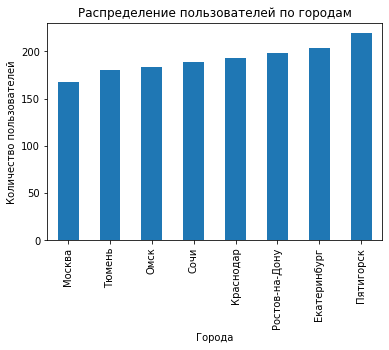

In [18]:
users_go_city.plot(kind='bar')
plt.title('Распределение пользователей по городам')
plt.xlabel('Города')
plt.ylabel('Количество пользователей')
plt.show()

Больше всего пользователей сервиса в Пятигорске, реже всего пользуются сервисом в Москве.

In [19]:
#соотношение пользователей с подпиской и без подписки;
users_go_subscription = users_go['subscription_type'].value_counts().sort_values()
print(users_go_subscription)

ultra    699
free     835
Name: subscription_type, dtype: int64


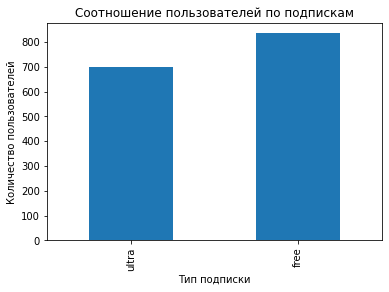

In [20]:
users_go_subscription.plot(kind='bar')
plt.title('Соотношение пользователей по подпискам')
plt.xlabel('Тип подписки')
plt.ylabel('Количество пользователей')
plt.show()

In [21]:
print(f'Платной подпиской пользуется {round(699/len(users_go)*100, 2)}%')

Платной подпиской пользуется 45.57%


Немного меньше половины пользователей используют платную подписку.

In [22]:
#возраст пользователей;
users_go_age = users_go['age'].value_counts()
print(users_go_age)

25    145
24    132
26    131
23    129
27    119
22    119
28    112
21     93
20     71
30     68
29     68
31     48
19     47
18     46
32     41
33     39
17     26
34     19
16     19
35     15
15     13
14      9
13      8
36      6
12      4
38      3
37      2
39      1
43      1
Name: age, dtype: int64


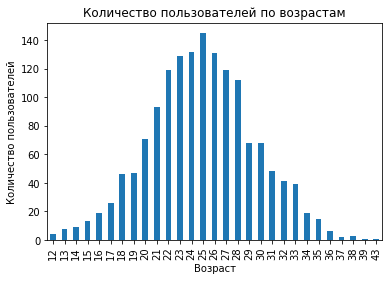

In [23]:
users_go_age.sort_index(inplace=False).plot(kind='bar')
plt.title('Количество пользователей по возрастам')
plt.xlabel('Возраст')
plt.ylabel('Количество пользователей')
plt.show()

<AxesSubplot:>

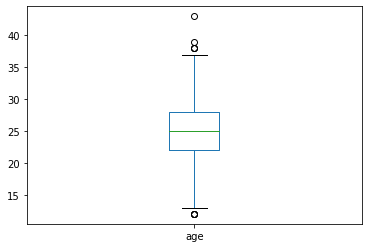

In [24]:
#Внесенные изменения V1:
users_go['age'].plot.box()

Есть выбросы, но их количество незначительно и сами значения вполне реальны.Оствим их без изменений.

In [25]:
users_go['age'].describe()

count    1534.000000
mean       24.903520
std         4.572367
min        12.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        43.000000
Name: age, dtype: float64

Гистограмма пользователей по возрастам распределена нормально. Средний возраст пользователей близок к 25 годам и имеет стандартное отклонение около 4.6 лет. Самому молодому пользователю - 12 лет, а самому возрастному - 43 года.

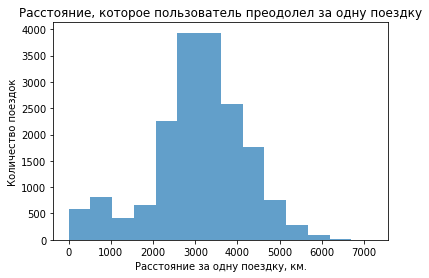

In [26]:
#расстояние, которое пользователь преодолел за одну поездку;
rides_go_distance = rides_go['distance']

rides_go_distance.plot.hist(bins=14, alpha=0.7)
plt.xlabel('Расстояние за одну поездку, км.')
plt.ylabel('Количество поездок')
plt.title('Расстояние, которое пользователь преодолел за одну поездку')
plt.show()

<AxesSubplot:>

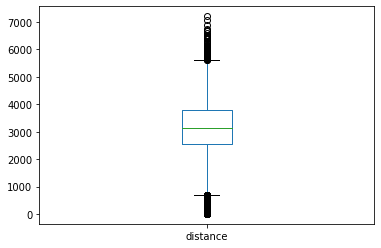

In [27]:
#Внесенные изменения V1:
rides_go['distance'].plot.box()

In [28]:
rides_go_distance.describe()

count    18068.000000
mean      3070.659976
std       1116.831209
min          0.855683
25%       2543.226360
50%       3133.609994
75%       3776.222735
max       7211.007745
Name: distance, dtype: float64

Основная часть поездок занимает от 2500 до 3800 метров. Медиана 3133 метра. Поездки на расстояние более 5 км редки. Однако на гистограмме видно, что некоторая часть пользователей использует самокаты для коротких поездок - до 1500 м.

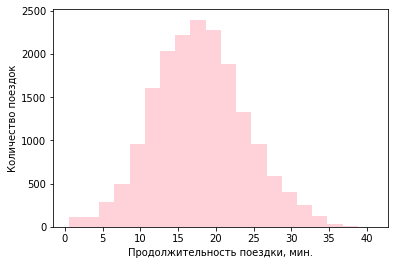

In [29]:
#продолжительность поездок
rides_go_duration = rides_go['duration']

rides_go_duration.plot.hist(bins=20, alpha=0.7, color='pink')
plt.xlabel('Продолжительность поездки, мин.')
plt.ylabel('Количество поездок')
plt.show()

In [30]:
rides_go_duration.describe()

count    18068.000000
mean        17.805011
std          6.091051
min          0.500000
25%         13.597563
50%         17.678395
75%         21.724800
max         40.823963
Name: duration, dtype: float64

Продолжительность поездок также как и расстояние поездок распределена нормально. В среднем на поездку у пользователей уходит около 17.5 минут. Самая долгая поездка длилась практически 41 минуту.

<b> Вывод по шагу 3 </b>

Таким образом, больше всего пользователей в Пятигорске, меньше всего в Москве. 54% (835 человек) представленных пользователей испоьзуют подписку free.Средний возраст пользователей близок к 25 годам. Люди в среднем проезжают 3070.7 метров, при этом половина пользователей проезжает 3133.6 метров. В среднем на поездку у пользователей уходит около 17.5 минут.


#### Шаг 4. Объединение данных

In [31]:
#Объединидам данные о пользователях, поездках и подписках в один датафрейм.
all_df = users_go.merge(rides_go, on='user_id', how='inner')
all_df = all_df.merge(subscriptions_go, on='subscription_type', how='inner')       

In [32]:
all_df

,user_id,name,age,city,subscription_type,distance,duration,date,date_m,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199
...,...,...,...,...,...,...,...,...,...,...,...,...
18063,1534,Альберт,25,Краснодар,free,3781.098080,19.822962,2021-11-04,11,8,50,0
18064,1534,Альберт,25,Краснодар,free,2840.423057,21.409799,2021-11-16,11,8,50,0
18065,1534,Альберт,25,Краснодар,free,3826.185507,18.435051,2021-11-18,11,8,50,0
18066,1534,Альберт,25,Краснодар,free,2902.308661,16.674362,2021-11-27,11,8,50,0


In [33]:
#Внесенные изменения V1:
#проверим размерность таблиц до и после объединения
print(f'Число строк и столбцов до объединения {users_go.shape}, соответственно в таблице users_go.')
print(f'Число строк и столбцов до объединения {rides_go.shape}, соответственно в таблице rides_go.')
print(f'Число строк и столбцов до объединения {subscriptions_go.shape}, соответственно в таблице subscriptions_go.')
print(f'Число строк и столбцов после объединения 3 таблиц {all_df.shape}, соответственно.')

Число строк и столбцов до объединения (1534, 5), соответственно в таблице users_go.
Число строк и столбцов до объединения (18068, 5), соответственно в таблице rides_go.
Число строк и столбцов до объединения (2, 4), соответственно в таблице subscriptions_go.
Число строк и столбцов после объединения 3 таблиц (18068, 12), соответственно.


Так как для объединения был выбран метод merge, то размерность полученной таблицы соответствует ожидаемым результатам, т.е. 18068 строк и 12 столбцов.

In [34]:
#создадим ещё два датафрейма на основе all_df
# 1 c данными о пользователях без подписки;
all_df_free = all_df[all_df['subscription_type'] == 'free'].reset_index()
all_df_free

,index,user_id,name,age,city,subscription_type,distance,duration,date,date_m,minute_price,start_ride_price,subscription_fee
0,6500,700,Айдар,22,Омск,free,2515.690719,14.944286,2021-01-02,1,8,50,0
1,6501,700,Айдар,22,Омск,free,846.932642,16.234663,2021-02-01,2,8,50,0
2,6502,700,Айдар,22,Омск,free,4004.434142,20.016628,2021-02-04,2,8,50,0
3,6503,700,Айдар,22,Омск,free,1205.911290,9.782872,2021-02-10,2,8,50,0
4,6504,700,Айдар,22,Омск,free,3047.379435,17.427673,2021-02-14,2,8,50,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11563,18063,1534,Альберт,25,Краснодар,free,3781.098080,19.822962,2021-11-04,11,8,50,0
11564,18064,1534,Альберт,25,Краснодар,free,2840.423057,21.409799,2021-11-16,11,8,50,0
11565,18065,1534,Альберт,25,Краснодар,free,3826.185507,18.435051,2021-11-18,11,8,50,0
11566,18066,1534,Альберт,25,Краснодар,free,2902.308661,16.674362,2021-11-27,11,8,50,0


In [35]:
# 2 с данными о пользователях с подпиской.
all_df_ultra = all_df[all_df['subscription_type'] == 'ultra']
all_df_ultra

,user_id,name,age,city,subscription_type,distance,duration,date,date_m,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199
...,...,...,...,...,...,...,...,...,...,...,...,...
6495,699,Оксана,22,Москва,ultra,3973.046497,24.671163,2021-08-29,8,6,0,199
6496,699,Оксана,22,Москва,ultra,3288.702563,15.892886,2021-09-12,9,6,0,199
6497,699,Оксана,22,Москва,ultra,3076.159348,14.389525,2021-09-26,9,6,0,199
6498,699,Оксана,22,Москва,ultra,4707.845501,15.839579,2021-10-17,10,6,0,199


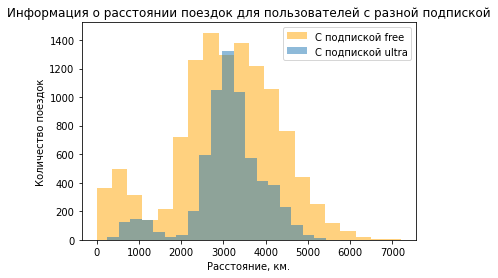

In [36]:
#визуализируем информацию о расстоянии и времени поездок для пользователей обеих категорий
all_df_free['distance'].plot.hist(bins=20, alpha=0.5, color='orange')
all_df_ultra['distance'].plot.hist(bins=20, alpha=0.5)
plt.xlabel('Расстояние, км.')
plt.ylabel('Количество поездок')
plt.title('Информация о расстоянии поездок для пользователей с разной подпиской')
plt.legend(['С подпиской free', 'С подпиской ultra'])
plt.show()

Из графика видно, что имеется по 2 пика на каждом типе подписки. В общем числе поездок преобладет бесплатная подписка (видно из площади под графиком), В поездках до 1 км. средняя дальность поездки немного выше, чем в платной. Максимальная дальность поездок у пользователей с бесплатной поездкой больше почти на 1,5 км. и составляет около 7 км.

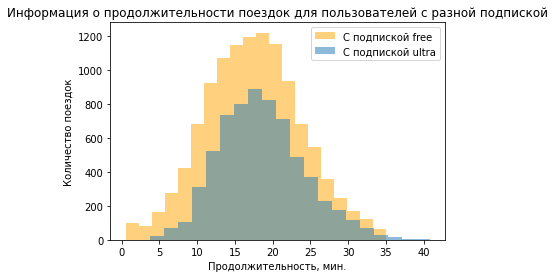

In [37]:
all_df_free['duration'].plot.hist(bins=20, alpha=0.5, color='orange')
all_df_ultra['duration'].plot.hist(bins=20, alpha=0.5)
plt.xlabel('Продолжительность, мин.')
plt.ylabel('Количество поездок')
plt.title('Информация о продолжительности поездок для пользователей с разной подпиской')
plt.legend(['С подпиской free', 'С подпиской ultra'])
plt.show()

Из обоих графиков видно, что пользователи чаще пользуются подпиской free. Пики в обоих датасетах и по продолжительности и по расстоянию примерно равны и распределены нормально вокруг среднего значения.

У пользователей без подписки значительно больше коротких поездок - до 1 км и в целом максимальная дальность поездки выше, чем у платных пользователей.

#### Шаг 5. Подсчёт выручки

5.1 Создадим датафрейм с агрегированными данными о поездках на основе датафрейма с объединёнными данными из шага 4: найдем суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц.

In [38]:
#Внесенные изменения V1:
all_df['duration'] = np.ceil(all_df['duration'])
all_df

,user_id,name,age,city,subscription_type,distance,duration,date,date_m,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,26.0,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,16.0,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,7.0,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,19.0,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,27.0,2021-08-28,8,6,0,199
...,...,...,...,...,...,...,...,...,...,...,...,...
18063,1534,Альберт,25,Краснодар,free,3781.098080,20.0,2021-11-04,11,8,50,0
18064,1534,Альберт,25,Краснодар,free,2840.423057,22.0,2021-11-16,11,8,50,0
18065,1534,Альберт,25,Краснодар,free,3826.185507,19.0,2021-11-18,11,8,50,0
18066,1534,Альберт,25,Краснодар,free,2902.308661,17.0,2021-11-27,11,8,50,0


In [39]:
df_agr_month = pd.pivot_table(all_df,
                   index=["user_id", "date_m"],
                   values=["distance", "duration"]
                   )
df_agr_month['count_rides'] = all_df.groupby(['user_id','date_m'])['user_id'].count()
df_agr_month

distance   duration  count_rides
user_id date_m                                     
1       1       3513.755647  21.000000            2
        4        754.159807   7.000000            1
        8       3361.735280  23.000000            2
        10      2904.955550  16.000000            2
        11      2334.499788  18.666667            3
...                     ...        ...          ...
1534    6       1704.734267  13.000000            2
        8       3811.226517  24.000000            2
        9       4928.173852  23.000000            1
        11      3337.503826  19.500000            4
        12      2371.711192  16.000000            1

[11331 rows x 3 columns]

5.2 Добавим в новый датафрейм столбец с помесячной выручкой, которую принёс каждый пользователь. Продолжительность каждой поездки в каждой строке исходного датафрейма для подсчёта стоимости округляется до следующего целого числа.

Помесячная выручка считается по формуле: (стоимость старта поездки ×  количество поездок) + стоимость одной минуты поездки × общая продолжительность всех поездок в минутах) + стоимость подписки.

In [40]:
df_agr_month['start_ride_price'] = all_df.groupby(['user_id','date_m'])['start_ride_price'].max()
df_agr_month['minute_price'] = all_df.groupby(['user_id','date_m'])['minute_price'].max()
df_agr_month['subscription_fee'] = all_df.groupby(['user_id','date_m'])['subscription_fee'].max()
df_agr_month

distance   duration  count_rides  start_ride_price  \
user_id date_m                                                          
1       1       3513.755647  21.000000            2                 0   
        4        754.159807   7.000000            1                 0   
        8       3361.735280  23.000000            2                 0   
        10      2904.955550  16.000000            2                 0   
        11      2334.499788  18.666667            3                 0   
...                     ...        ...          ...               ...   
1534    6       1704.734267  13.000000            2                50   
        8       3811.226517  24.000000            2                50   
        9       4928.173852  23.000000            1                50   
        11      3337.503826  19.500000            4                50   
        12      2371.711192  16.000000            1                50   

                minute_price  subscription_fee  
user_id date_m                                  
1       1                  6               199  
        4                  6               199  
        8                  6               199  
        10                 6               199  
        11                 6               199  
...                      ...               ...  
1534    6                  8                 0  
        8                  8                 0  
        9                  8                 0  
        11                 8                 0  
        12                 8                 0  

[11331 rows x 6 columns]

In [ ]:
df_agr_month['debt'] = (df_agr_month['start_ride_price']*df_agr_month['count_rides']) + (df_agr_month['minute_price'] * np.ceil(df_agr_month['duration'])) +  df_agr_month['subscription_fee']
df_agr_month

distance   duration  count_rides  start_ride_price  \
user_id date_m                                                          
1       1       3513.755647  21.000000            2                 0   
        4        754.159807   7.000000            1                 0   
        8       3361.735280  23.000000            2                 0   
        10      2904.955550  16.000000            2                 0   
        11      2334.499788  18.666667            3                 0   
...                     ...        ...          ...               ...   
1534    6       1704.734267  13.000000            2                50   
        8       3811.226517  24.000000            2                50   
        9       4928.173852  23.000000            1                50   
        11      3337.503826  19.500000            4                50   
        12      2371.711192  16.000000            1                50   

                minute_price  subscription_fee   debt  
user_id date_m                                         
1       1                  6               199  325.0  
        4                  6               199  241.0  
        8                  6               199  337.0  
        10                 6               199  295.0  
        11                 6               199  313.0  
...                      ...               ...    ...  
1534    6                  8                 0  204.0  
        8                  8                 0  292.0  
        9                  8                 0  234.0  
        11                 8                 0  360.0  
        12                 8                 0  178.0  

[11331 rows x 7 columns]

In [42]:
# Код ревьюера
df_agr_month.groupby('subscription_fee')['debt'].mean()

subscription_fee
0      229.796999
199    314.029782
Name: debt, dtype: float64

#### Шаг 6. Проверка гипотез

6.1 Важно понять, тратят ли пользователи с подпиской больше времени на поездки? Если да, то пользователи с подпиской могут быть «выгоднее» для компании. Проверим гипотезу. Используем исходные данные о продолжительности каждой сессии — отдельно для подписчиков и тех, у кого нет подписки.

In [43]:
# Ho = пользователи с подпиской тратят столько же времени на поездки, сколько пользователи без подписки
# H1 = пользователи с подпиской тратят больше времени на поездки, чем пользователи без подписки

alpha = 0.01 # уровень статистической значимости
# если p-value окажется меньше него, отвергнем гипотезу

results = st.ttest_ind(all_df_ultra['duration'], all_df_free['duration'], alternative='greater')

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 1.2804098316645618e-34
Отвергаем нулевую гипотезу


**В результате проверки отвергаем гипотезу Ho, значит можно сказать, значимым является вывод о том, что пользователи с подпиской тратят больше времени на поездки, чем пользователи без подписки.**

6.2 Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката. Проверим гипотезу о том, что расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров.

In [45]:
#Внесенные изменения V1:
# Ho = пользователи с подпиской проезжают с одной поездки 3130 метров
# H1 = пользователи с подпиской проезжают не более 3130 метров за одну поездку

variable = 3130
alpha = 0.05 # уровень статистической значимости
# если p-value окажется меньше него, отвергнем гипотезу

results = st.ttest_1samp(all_df_ultra['distance'], variable, alternative='greater')

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 0.9195368847849785
Не получилось отвергнуть нулевую гипотезу


**Не получилось отвергнуть гипотезу Ho, значит можно сказать, что значимым является вывод, что пользователи с подпиской проезжают 3130 метров за одну поездку и износ самокатов происходит оптимально.**

6.3. Проверим гипотезу о том, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки.

In [46]:
df_agr_month_free = df_agr_month[df_agr_month['subscription_fee'] == 0]
#df_agr_month_free = df_agr_month_free.reset_index()
df_agr_month_free = df_agr_month_free.groupby('date_m')['debt'].sum().to_frame(name='debt')
df_agr_month_free

,debt
date_m,
1,136634.0
2,117656.0
3,128750.0
4,129094.0
5,133102.0
6,135272.0
7,129478.0
8,129396.0
9,133860.0


In [47]:
df_agr_month_ultra = df_agr_month[df_agr_month['subscription_fee'] == 199]
#df_agr_month_ultra = df_agr_month_ultra.reset_index()
df_agr_month_ultra = df_agr_month_ultra.groupby('date_m')['debt'].sum().to_frame(name='debt')
df_agr_month_ultra

,debt
date_m,
1,122808.0
2,111936.0
3,123888.0
4,117296.0
5,127131.0
6,125078.0
7,122712.0
8,121032.0
9,111607.0


In [48]:
# Ho = Помесячная выручка от пользователей с подпиской равна помесячной выручке от пользователей без подписки
# H1 = Помесячная выручка от пользователей с подпиской выше помесячной выручки от пользователей без подписки

alpha = 0.05 # уровень статистической значимости
# если p-value окажется меньше него, отвергнем гипотезу

results = st.ttest_ind(df_agr_month_ultra, df_agr_month_free, alternative='greater')

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: [0.99997824]
Не получилось отвергнуть нулевую гипотезу


**Не получилось отвергнуть гипотезу Ho, значит можно сказать, что значимой является гипотеза, что помесячная выручка от пользователей с подпиской равна помесячной выручке от пользователей без подписки**

6.4. Представим такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест нам понадобился бы для проверки этой гипотезы?

**Для проверки нам нужно использовать гепотезу о равенстве средних для зависимых (парных) выборок, со следующими гипотезами:**

- Ho = количестве обращений до обновления и после него не изменилось
- H1 = количество обращений после обновления значительно меньше, чем до него

Для проверки понадобится ttest_rel

In [49]:
# **Общий вывод:**

# Мы ознакомились с данными 3 датафреймов, изменили тип данных столбца data в одной из таблиц и удалили 31 явный дубликат из таблицы users_go, а также убедились в отсутствии дубликатов в других таблицах. У большенства дубликатов в списке имелась платная подписка. Возможно эти аккаунты были перерегистрированы и на новых учетных записях применен промокод, который позволял активировать месяц бесплатных поездок для новых пользователей.

# Больше всего пользователей в Пятигорске, меньше всего в Москве. 54% (835 человек) представленных пользователей испоьзуют подписку free. Средний возраст пользователей близок к 25 годам. Люди в среднем проезжают 3070.7 метров, при этом половина пользователей проезжает 3133.6 метров. В среднем на поездку у пользователей уходит около 17.5 минут.

# Проверка гипотиз показала, что значимыми являются выводы о том, что: 
# - пользователи с подпиской тратят больше времени на поездки, чем пользователи без подписки;
# - пользователи с подпиской проезжают 3130 метров за одну поездку - расстояние оптимальное с точки зрения износа самоката;
# - помесячная выручка от пользователей с подпиской равна помесячной выручке от пользователей без подписки.

# Из чего следует, что условия подписки не самые прибыльные и эффективные с точки зрения бизнеса, маркетологам стои пересмотреть свои предложения по условиям подписки и акциям, возможно привлечь акциями различные возрастные категории и диверсифицировать акции и тарифы в зависимости от города.



#### Шаг 7. Распределения

7.1 Отделу маркетинга GoFast поставили задачу: нужно провести акцию с раздачей промокодов на один бесплатный месяц подписки, в рамках которой как минимум 100 существующих клиентов должны продлить эту подписку. То есть по завершении периода действия подписки пользователь может либо отказаться от неё, либо продлить, совершив соотвествующий платёж. 

Эта акция уже проводилась ранее и по итогу выяснилось, что после бесплатного пробного периода подписку продлевают 10 % пользователей. Выясните, какое минимальное количество промокодов нужно разослать, чтобы вероятность не выполнить план была примерно 5 %. Подберите параметры распределения, описывающего эту ситуацию, постройте график распределения и сформулируйте ответ на вопрос о количестве промокодов.

Нужно использовать биномиальное распределение, которое описывает указанную ситуацию. Затем подобрать подходящее значение параметра N для заданного параметра p=0.1 с помощью графиков и метода cdf(), сформулировать вывод и ответ.

/opt/conda/lib/python3.9/site-packages/scipy/stats/_discrete_distns.py:78: RuntimeWarning: divide by zero encountered in _binom_pdf
  return _boost._binom_pdf(x, n, p)


<BarContainer object of 1001 artists>

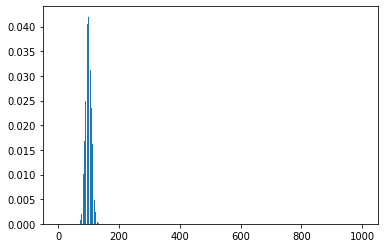

In [50]:
n=1000
p=0.1
alpha = 0.05

free_action = []

for k in range(0, n + 1):
    action_var = binom.pmf(k, n, p)
    free_action.append(action_var)

plt.bar(range(0, n+1), free_action)

**Вывод:**

7.2 Отдел маркетинга рассылает клиентам push-уведомления в мобильном приложении. Клиенты могут открыть его или не открывать. Известно, что уведомления открывают около 40 % получивших клиентов. Отдел планирует разослать 1 млн уведомлений. С помощью аппроксимации постройте примерный график распределения и оцените вероятность того, что уведомление откроют не более 399,5 тыс. пользователей.

Вероятность того, что уведомление откроют не более 399,5 тыс. пользователей: 15.37%


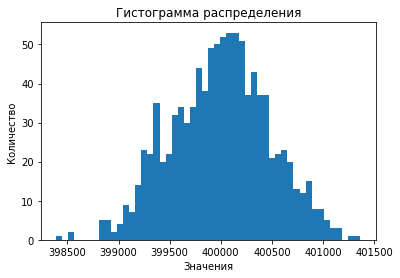

In [51]:
#Аналогично заданию выше, я не понимаю как его решить до конца (график). Дайте, пожалуйста, наводки.


# задаём параметры биномиального распределения
n = 1000000
p = 0.4

# задаём параметры нормального распределения равными
# мат.ожиданию и дисперсии биномиального распределения
mu = n * p
sigma = sqrt(n * p * (1 - p))


# задаём нормальное распределение
distr = st.norm(mu, sigma) 

# считаем вероятность хвоста слева от 399,5 тысяч пользователей
result = distr.cdf(399500)
print(f'Вероятность того, что уведомление откроют не более 399,5 тыс. пользователей: {round(result*100, 2)}%')






#Внесенные изменения V1

s = np.random.normal(mu, sigma, 1000) #данные для графика распределния
plt.hist(s, bins=50)
plt.xlabel('Значения')
plt.ylabel('Количество')
plt.title('Гистограмма распределения')
plt.show()

**Вывод:** Из графика видно, что около половины (500) итераций попадпют в значения менее 400000 (пик), следовательно вывод о том, что вероятность того, что уведомление откроют не более 399,5 тыс. пользователей: 15.37% звучит правдоподобно.


**Общий вывод:**

Мы ознакомились с данными 3 датафреймов, изменили тип данных столбца data в одной из таблиц и удалили 31 явный дубликат из таблицы users_go, а также убедились в отсутствии дубликатов в других таблицах. У большенства дубликатов в списке имелась платная подписка. Возможно эти аккаунты были перерегистрированы и на новых учетных записях применен промокод, который позволял активировать месяц бесплатных поездок для новых пользователей.

Больше всего пользователей в Пятигорске, меньше всего в Москве. 54% (835 человек) представленных пользователей испоьзуют подписку free. Средний возраст пользователей близок к 25 годам. Люди в среднем проезжают 3070.7 метров, при этом половина пользователей проезжает 3133.6 метров. В среднем на поездку у пользователей уходит около 17.5 минут.

Проверка гипотиз показала, что значимыми являются выводы о том, что: 
- пользователи с подпиской тратят больше времени на поездки, чем пользователи без подписки;
- пользователи с подпиской проезжают 3130 метров за одну поездку - расстояние оптимальное с точки зрения износа самоката;
- помесячная выручка от пользователей с подпиской равна помесячной выручке от пользователей без подписки.

Из чего следует, что условия подписки не самые прибыльные и эффективные с точки зрения бизнеса, маркетологам стои пересмотреть свои предложения по условиям подписки и акциям, возможно привлечь акциями различные возрастные категории и диверсифицировать акции и тарифы в зависимости от города.

